In [28]:
import math 
import numpy as np
import random 
import matplotlib.pyplot as plt 

In [29]:
T =2.0
N = 1000
n = 10**4
del_T = T/n

We consider the expressions:

$$
I_n = \sum_{i=1}^{n} W_{t_{i-1}^{n}} \Delta W_{t_i^n}, \quad J_n = \sum_{i=1}^{n} W_{t_i^{n}} \Delta W_{t_i^n} \quad \text{and} \quad K_n = \sum_{i=1}^{n} \frac{W_{t_i^{n}} + W_{t_{i-1}^{n}}}{2} \Delta W_{t_i^n} = \frac{1}{2}(I_n + J_n)
$$

Where the increment is defined as:

$$
\Delta W_{t_i^n} = W_{t_i^{n}} - W_{t_{i-1}^{n}}
$$

And we define:

$$
\begin{align*}
WI_n &= \frac{1}{2}W_T^2 - I_n, \\
WJ_n &= \frac{1}{2}W_T^2 - J_n, \\
WK_n &= \frac{1}{2}W_T^2 - K_n = \frac{1}{2}(WI_n + WJ_n)
\end{align*}
$$


Given that:

$$
\begin{align*}
K_n &= \frac{1}{2} \sum_{i=1}^{n} (W_{t_i^{n}} + W_{t_{i-1}^{n}})(W_{t_i^{n}} - W_{t_{i-1}^{n}}) \\
&= \frac{1}{2} \sum_{i=1}^{n} (W_{t_i^{n}}^2 - W_{t_{i-1}^{n}}^2) \\
&= \frac{1}{2} W_T^2
\end{align*}
$$

We can deduce:

$$
\boxed{WK_n = 0 \quad \text{and} \quad WI_n = -WJ_n} \quad \quad (*)
$$




We have:

$$
\begin{align*}
WI_n - WJ_n &= J_n - I_n \\
&= \sum_{i=1}^{n} (\Delta W_{t_i^n})^2 \\
&= \frac{T}{n} \sum_{i=1}^{n} G_i^2 \quad \text{where} \quad G_i \sim N(0, 1)
\end{align*}
$$

Thus,

$$
\boxed{WI_n - WJ_n \sim \frac{T}{n} \chi_2(n)} \quad \quad (**)
$$

From $(*)$ and $(**)$ we have:

$$
\boxed{WI_n - WJ_n \sim \frac{T}{n}\chi_2(n) \quad \text{and} \quad WI_n + WJ_n = 0}
$$

Leading to:

$$
\boxed{WI_n \sim \frac{T}{2n}\chi_2(n) \quad \text{and} \quad  WJ_n \sim -\frac{T}{2n}\chi_2(n)}
$$

### Expectation and Variance

Considering that:

$$
\mathbb{E}[\chi_2(N)] = n \quad \text{and} \quad \mathbb{V}ar[\chi_2(n)] = 2n
$$

We can derive:

$$
\begin{align*}
\mathbb{E}[WI_n] &= \frac{T}{2}, \\
\mathbb{Var}[WI_n] &= \frac{T^2}{2n},
\end{align*}
$$

And similarly,

$$
\begin{align*}
\mathbb{E}[WJ_n] &= -\frac{T}{2}, \\
\mathbb{Var}[WJ_n] &= \frac{T^2}{2n}.
\end{align*}
$$


In [30]:
def simulate_brownian_motion(num_paths, total_time, num_steps):
    """
    Simulate Brownian Motion.

    Parameters:
    - num_paths (int): Number of simulation paths.
    - total_time (float): Total simulation time.
    - num_steps (int): Number of time steps.

    Returns:
    - brownian_paths (ndarray): Simulated paths of the Brownian motion.
    """
    
    time_increment = total_time / num_steps
    random_increments = np.random.randn(num_paths, num_steps) * np.sqrt(time_increment)
    brownian_paths = np.cumsum(random_increments, axis=1)
    brownian_paths = np.concatenate((np.zeros((num_paths, 1)), brownian_paths), axis=1)
    
    return brownian_paths

def simulate_W_IJK(N, T, n):
    """
    Compute I, J, K, and final values for Brownian motion paths.

    Parameters:
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.
    - n (int): Number of time steps.

    Returns:
    - WT_I, WT_J, WT_K (tuple): Computed values based on Brownian motion paths.
    """
    
    W = simulate_brownian_motion(N, T, n)  # Simulate Brownian motion
    
    # Compute I, J, K using vectorized operations along the time axis
    I = np.sum(W[:, :-1] * (W[:, 1:] - W[:, :-1]), axis=1)
    J = np.sum(W[:, 1:] * (W[:, 1:] - W[:, :-1]), axis=1)
    K = np.sum((W[:, 1:] + W[:, :-1]) / 2.0 * (W[:, 1:] - W[:, :-1]), axis=1)
    
    # Compute final values using I, J, K
    WT_I = 0.5 * W[:, -1] * W[:, -1] - I
    WT_J = 0.5 * W[:, -1] * W[:, -1] - J
    WT_K = 0.5 * W[:, -1] * W[:, -1] - K
    
    return WT_I, WT_J, WT_K


In [31]:
def compute_mean_std_IJK(N, T, n, print_results=False):
    """
    Compute and optionnally print the mean and standard deviation of WT_I, WT_J, WT_K.

    Parameters:
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.
    - n (int): Number of time steps.
    - print_results (bool): Flag to print the results.

    Returns:
    - tuple: Mean and standard deviation of WT_I, WT_J, WT_K.
    """
    
    WT_I, WT_J, WT_K = simulate_W_IJK(N, T, n)
    
    means = np.mean([WT_I, WT_J, WT_K], axis=1)
    std_devs = np.std([WT_I, WT_J, WT_K], axis=1)
    
    if print_results:
        variables = ['I', 'J', 'K']
        for i, (mean, std) in enumerate(zip(means, std_devs)):
            print("\n=============================================================")
            print(f"The sample mean of 1/2*W_T^2 - {variables[i]}_n: {mean}")
            print(f"The sample std dev of 1/2*W_T^2 - {variables[i]}_n: {std}")
            print("=============================================================")
    
    return (*means, *std_devs)

# Example usage
N = 1000  # Example value, replace with actual
T = 2.0   # Example value, replace with actual
n = 10   # Example value, replace with actual

_ = compute_mean_std_IJK(N, T, n, True)


The sample mean of 1/2*W_T^2 - I_n: 0.9756449964718624
The sample std dev of 1/2*W_T^2 - I_n: 0.4321872064150621

The sample mean of 1/2*W_T^2 - J_n: -0.9756449964718624
The sample std dev of 1/2*W_T^2 - J_n: 0.43218720641506203

The sample mean of 1/2*W_T^2 - K_n: 3.048351933764427e-19
The sample std dev of 1/2*W_T^2 - K_n: 2.002283840672624e-16


Theorically, we have $WK_n = 0$. Thus, $ \mathbb{E}[WK_n] = 0$ and $ \mathbb{V}ar[WK_n] = 0$. The sample mean and variance are in agreement with these theoretical results.

We have taken $T=2$ and $n = 10$. Thus,  $ \mathbb{E}[WI_n] = \frac{T}{2} = 1 $ and $ \sigma[WK_n] = \frac{T}{\sqrt{2n}} \sim 0.447213 \implies $ The sample mean and variance are in agreement with these theoretical results.

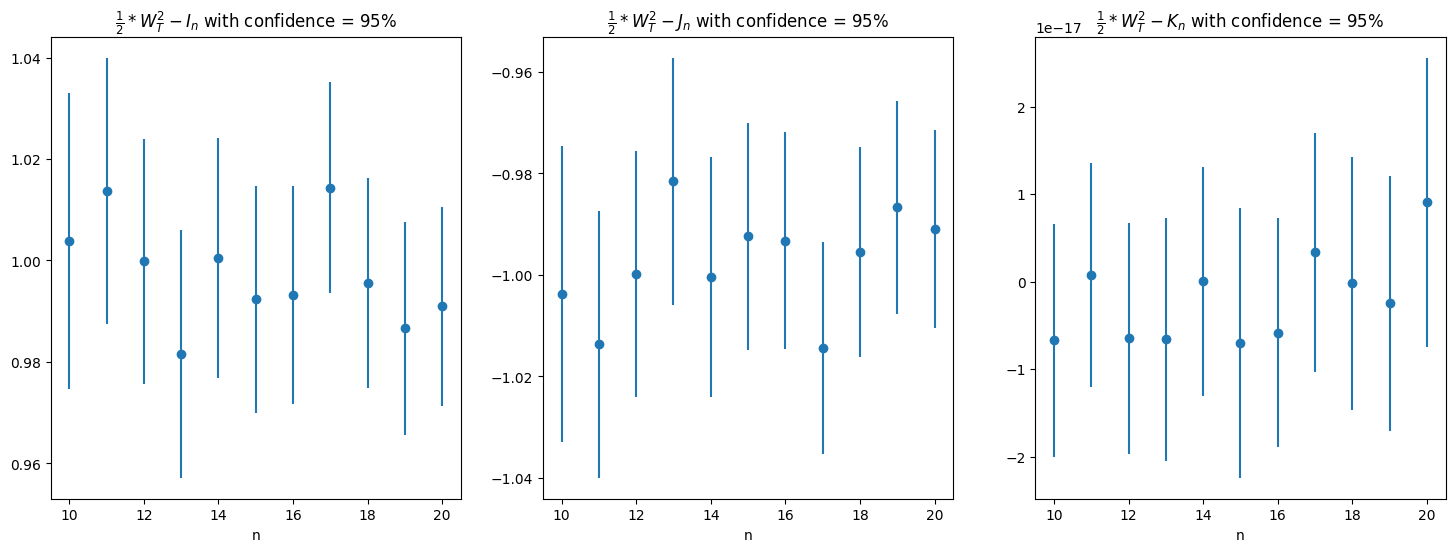

In [32]:
def calculate_means_and_intervals(n_array, N, T):
    """
    - Calculate means and confidence intervals for WT_I, WT_J, WT_K.
    - We build 95% confidence intervals ==> The use of 1.96 as quantile.
    - In the code, we define a interval by his "half_width"
    - Knowing the sample mean and the half width is enough to compute the interval.

    Parameters:
    - n_array (array): Array of n values.
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.

    Returns:
    - means, intervals (tuple): Computed means and confidence intervals.
    """
    means = [[], [], []]
    intervals = [[], [], []]
    
    for i in n_array:
        mean_WT_I, mean_WT_J, mean_WT_K, std_WT_I, std_WT_J, std_WT_K = compute_mean_std_IJK(N, T, i)
        means[0].append(mean_WT_I)
        means[1].append(mean_WT_J)
        means[2].append(mean_WT_K)
        intervals[0].append(std_WT_I/np.sqrt(N)*1.96)
        intervals[1].append(std_WT_J/np.sqrt(N)*1.96)
        intervals[2].append(std_WT_K/np.sqrt(N)*1.96)
    
    return means, intervals

def plot_means_and_intervals(means, intervals, titles):
    """
    Plot means and confidence intervals.

    Parameters:
    - means (list): Computed means.
    - intervals (list): Computed confidence intervals.
    - titles (list): Titles for the subplots.
    """
    plt.figure(figsize=(18,6))
    
    for idx, title in enumerate(titles):
        ax = plt.subplot(1, 3, idx+1)
        plt.errorbar(x=nn, y=means[idx], yerr=intervals[idx], fmt='o')
        ax.set_title(title)
        ax.set_xlabel("n")
    
    plt.show()

# Example usage
nn = np.arange(10, 21)
N = 1000  
T = 2.0  

means, intervals = calculate_means_and_intervals(nn, N, T)

titles = [
    r"$\frac{1}{2}*W_T^2 - I_n$ with confidence = 95%",
    r"$\frac{1}{2}*W_T^2 - J_n$ with confidence = 95%",
    r"$\frac{1}{2}*W_T^2 - K_n$ with confidence = 95%"
]

plot_means_and_intervals(means, intervals, titles)


In [33]:
def simulate_W_ABC(N, T, n):
    """
    Simulate and compute WT_A, WT_B, WT_C.

    Parameters:
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.
    - n (int): Number of time steps.

    Returns:
    - tuple: WT_A, WT_B, WT_C.
    """
    
    W = simulate_brownian_motion(N, T, n)
    del_t = T / n
    t = np.arange(n + 1) * del_t
    
    increments = W[:, 1:] - W[:, :-1]
    exp_t = np.exp(t[:-1])
    exp_t_avg = np.exp((t[1:] + t[:-1]) / 2)
    
    A = np.sum(exp_t * increments, axis=1)
    B = np.sum(np.exp(t[1:]) * increments, axis=1)
    C = np.sum(exp_t_avg * increments, axis=1)

    WT_sq = 0.5 * W[:, -1] ** 2
    
    return WT_sq - A, WT_sq - B, WT_sq - C

def compute_mean_std_ABC(N, T, n, print_results=False):
    """
    Compute and optionally print the mean and standard deviation of WT_A, WT_B, WT_C.

    Parameters:
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.
    - n (int): Number of time steps.
    - print_results (bool): Flag to print the results.

    Returns:
    - tuple: Mean and standard deviation of WT_A, WT_B, WT_C.
    """
    
    WT_A, WT_B, WT_C = simulate_W_ABC(N, T, n)
    
    means = np.mean([WT_A, WT_B, WT_C], axis=1)
    std_devs = np.std([WT_A, WT_B, WT_C], axis=1)
    
    if print_results:
        variables = ['A', 'B', 'C']
        for i, (mean, std) in enumerate(zip(means, std_devs)):
            print('\n============================================================')
            print(f"The sample mean of 1/2*W_T^2 - {variables[i]}_n: {mean}")
            # print(f"The sample std dev of 1/2*W_T^2 - {variables[i]}_n: {std}")
            print('============================================================')

    return (*means, *std_devs)

# Example usage
N = 5*10**4  # Example value, replace with actual
T = 2.0   # Example value, replace with actual
n = 100   # Example value, replace with actual

_ = compute_mean_std_ABC(N, T, n, True)




The sample mean of 1/2*W_T^2 - A_n: 0.9864101332433698

The sample mean of 1/2*W_T^2 - B_n: 0.9859036987418514

The sample mean of 1/2*W_T^2 - C_n: 0.9861581820683137


We have 
$$
\begin{align*}
\mathbb{E}[A_n] &= \sum_{i = 1}^{N} \mathbb{E}[e^{t_{i-1}^n} \Delta W_{t_i^n}]\\ 
&= \sum_{i = 1}^{N} e^{t_{i-1}^n} \mathbb{E}[\Delta W_{t_i^n}] \\ 
&= 0 
\end{align*}
$$

We find using the same logic, $\mathbb{E}[B_n] = 0$ and $ \mathbb{E}[C_n] = 0$


We have $ \mathbb{E}[W_T^2] = T $

We deduce that 

$$
\boxed{\mathbb{E}[WA_n] = \frac{T}{2} \quad \text{and} \quad \mathbb{E}[WB_n] = \frac{T}{2} \quad \text{and} \quad \mathbb{E}[WC_n] = \frac{T}{2}  }
$$

We have $T=2$. Thus, $\mathbb{E}[WA_n] = \mathbb{E}[WB_n] = \mathbb{E}[WC_n] = 1  \implies$ The sample mean are in agreement with these theoretical results.


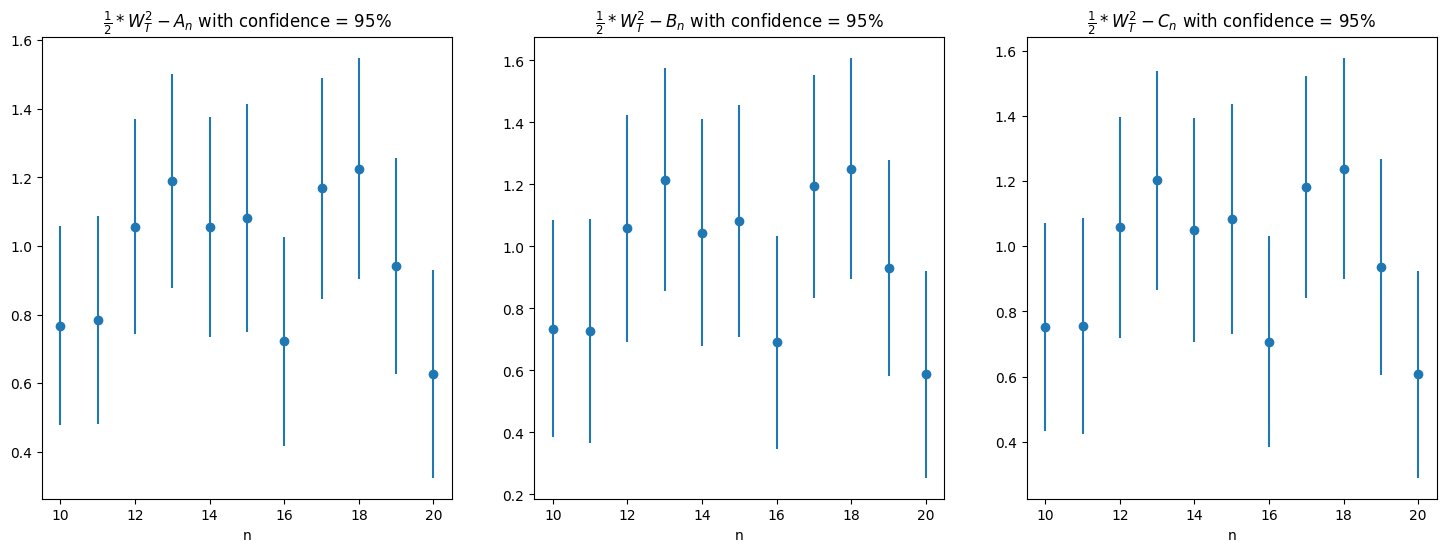

In [34]:
def calculate_means_and_intervals_ABC(n_array, N, T):
    # We rewrite the same code as in qst 1, I know it is not efficicent to rewrite the code,  but it does the job
    """
    Calculate means and confidence intervals for WT_A, WT_B, WT_C.

    Parameters:
    - nn (array): Array of n values.
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.

    Returns:
    - means, intervals (tuple): Computed means and confidence intervals.
    """
    means = [[], [], []]
    intervals = [[], [], []]
    
    for i in n_array:
        mean_WT_A, mean_WT_B, mean_WT_C, std_WT_A, std_WT_B, std_WT_C = compute_mean_std_ABC(N, T, i)
        means[0].append(mean_WT_A)
        means[1].append(mean_WT_B)
        means[2].append(mean_WT_C)
        intervals[0].append(std_WT_A/np.sqrt(N)*1.96)
        intervals[1].append(std_WT_B/np.sqrt(N)*1.96)
        intervals[2].append(std_WT_C/np.sqrt(N)*1.96)
    
    return means, intervals

# Example usage
nn = np.arange(10, 21)
N = 1000  
T = 2.0  

means, intervals = calculate_means_and_intervals_ABC(nn, N, T)

titles = [
    r"$\frac{1}{2}*W_T^2 - A_n$ with confidence = 95%",
    r"$\frac{1}{2}*W_T^2 - B_n$ with confidence = 95%",
    r"$\frac{1}{2}*W_T^2 - C_n$ with confidence = 95%"
]

plot_means_and_intervals(means, intervals, titles)


In [35]:
def simulate_A_n(N, T, n):
    """
    Simulate A_n and calculate its mean and standard deviation.

    Parameters:
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.
    - n (int): Number of steps.

    Returns:
    - mean_A_n, std_A_n (tuple): Mean and standard deviation of A_n.
    """
    W = simulate_brownian_motion(N, T, n)
    A_n = np.sin(W[:, -1]) + 0.5/n * np.sum(np.sin(W[:, :-1]), axis=1)
    
    mean_A_n = np.mean(A_n)
    std_A_n = np.std(A_n)
    
    return mean_A_n, std_A_n

We have 
$$
A_n = sin(W_T) + \frac{1}{2n} \sum_{i=1}^{n} sin(W_{t_{i=1}^n})
$$

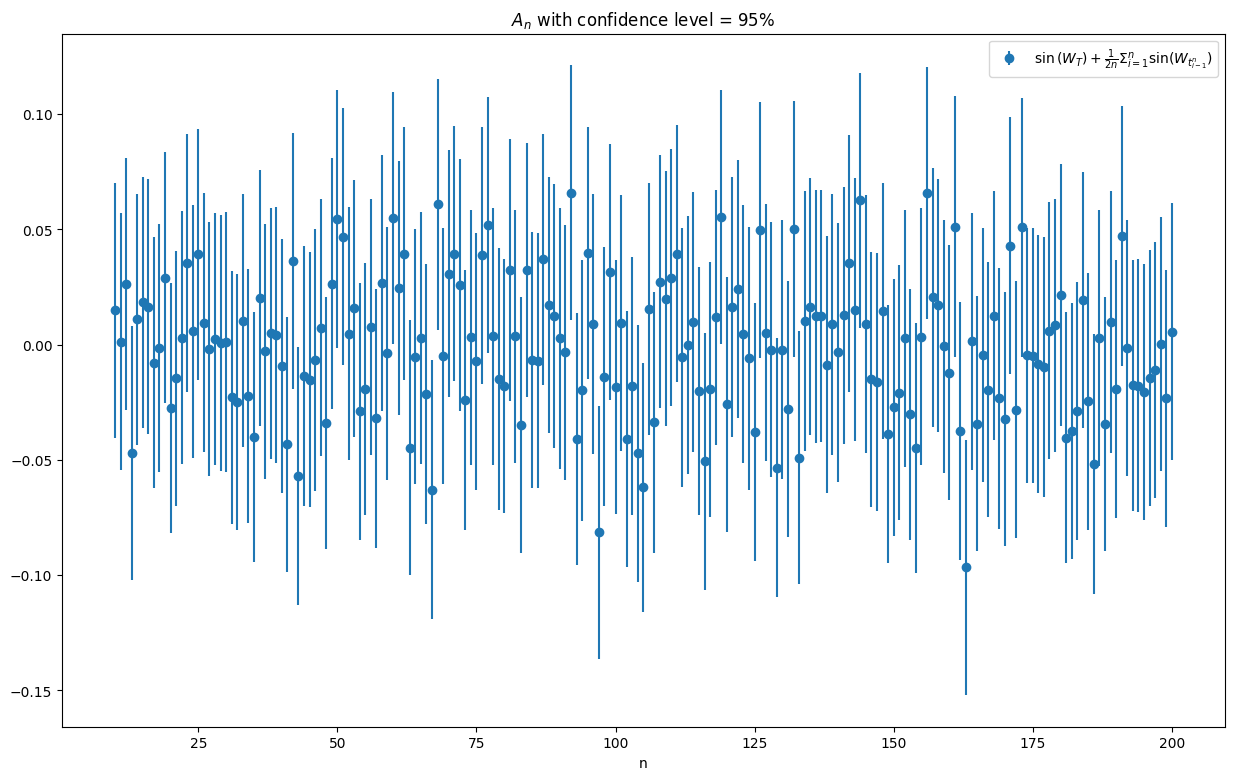

In [36]:
def calculate_means_and_intervals_Q3(nn, N, T):
    """
    Calculate means and confidence intervals for A_n.

    Parameters:
    - nn (array): Array of n values.
    - N (int): Number of simulation paths.
    - T (float): Total simulation time.

    Returns:
    - means, intervals (tuple): Computed means and confidence intervals.
    """
    means = []
    intervals = []
    
    for i in nn:
        mean_A_n, std_A_n = simulate_A_n(N, T, i)
        means.append(mean_A_n)
        intervals.append(std_A_n/np.sqrt(N)*1.96)
    return means, intervals

def plot_means_and_intervals_Q3(nn, means, intervals, title, xlabel):
    """
    Plot means and confidence intervals for A_n.

    Parameters:
    - nn (array): Array of n values.
    - means (list): Computed means.
    - intervals (list): Computed confidence intervals.
    - title (str): Title for the plot.
    - xlabel (str): Label for the x-axis.
    """
    plt.figure(figsize=(15,9))
    plt.errorbar(x=nn, y=means, yerr=intervals, fmt='o', 
                 label=r"$\sin{(W_T)} + \frac{1}{2n}\Sigma^n_{i=1}\sin(W_{t^n_{i-1}})$")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.legend(loc="best")
    plt.show()

# Example usage
N = 1000  
T = 2.0  
nn = np.arange(10, 201, 1)

means, intervals = calculate_means_and_intervals_Q3(nn, N, T)
plot_means_and_intervals_Q3(nn, means, intervals, r"$A_n$ with confidence level = 95%", "n")


for a $ t \in \mathbb{R}_+$, we have $W_T \sim N(0, t)$. Thus: 

$$
\mathbb{E}[sin(W_t)] = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi t}} sin(x) e^{\left(-\frac{x^2}{2t} \right)} dx
$$

We have $ x \rightarrow sin(x) $ is an odd function $\implies$ $ x \rightarrow sin(x)e^{\left(-\frac{x^2}{2t} \right)}$ is an odd function.

In this case, $\mathbb{E}(W_t) = 0$ $\implies$ The sample mean are in agreement with these theoretical results.